<a href="https://colab.research.google.com/github/VivekAChawla/DPRG-Test/blob/main/CAMM_Hackathon_4_Vivek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/KalininGroup/camm_hackathon/blob/k4my4r/docs/day_4_11072025/CAMM_Hackathon_4.ipynb)


# CAMM Hackathon — DARA XRD Toolkit
2025-11-07

1. **Automated Refinement with DARA** (peak finding / whole-pattern assistance)
2. **Phase Search & Triage** (identify candidate phases prior to refinement)

**Jump to sections**  
- [Part 1 — Automated Refinement with DARA](#part-1)  
- [Part 2 — Phase Search with DARA](#part-2)  


***Data used in this notebook is from the DARA repository***

Link to Paper: https://arxiv.org/abs/2510.19667

Dara Repository: https://github.com/idocx/dara

This section walks you through **automated refinement using DARA** —  
an AI-driven assistant for analyzing X-ray diffraction (XRD) data.  
It helps identify key peaks, perform rapid matching, and suggest refinement parameters automatically.

Typical workflow:
1. Load or upload XRD data (e.g., `.xy` files)
2. Use DARA to find peak positions and intensities
3. Visualize and verify the refinement fit
4. Save results for phase search


In [ ]:
# %% Setup (Colab)
# Uncomment and adapt as needed. Keep lightweight for hackathon use.
# !pip -q install numpy scipy matplotlib pandas scikit-learn plotly
# # Add domain-specific packages if required by your original notebooks:
# # !pip -q install pymatgen diffpy-cmi gsas2pkg

print('Environment check OK.')


Environment check OK.


# Part 1 — Automated Refinement with DARA
<a id='part-1'></a>


This section walks you through **automated refinement using DARA** —  
an AI-driven assistant for analyzing X-ray diffraction (XRD) data.  
It helps identify key peaks, perform rapid matching, and suggest refinement parameters automatically.

Typical workflow:
1. Load or upload XRD data (e.g., `.xy` files)
2. Use DARA to find peak positions and intensities
3. Visualize and verify the refinement fit
4. Save results for phase search


# Tutorial 1: Automated Refinement (with BGMN)
Dara provides a Python-based wrapper to the refinement software, BGMN, which implements a robust optimization algorithm that can refine automatically in most cases. This tutorial will show you how to interact with BGMN software and how to submit, adjust, and visualize your refinements.

> You can download this tutorial project from [here](https://idocx.github.io/dara/_static/tutorial.zip).

In [ ]:
%pip install ipywidgets nbformat
!pip install dara-xrd
!pip install kaleido==0.2.1 # Install a compatible version of kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.0/642.0 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.1/107.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.9/211.9 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.9/577.9 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 41.4 MB/s eta 0:00:00
   ━━━━━

In [ ]:
!git clone https://github.com/idocx/dara.git # Sample data from DARA repository
!mv dara/notebooks/tutorial_data .
!rm -rf dara

Cloning into 'dara'...
remote: Enumerating objects: 6278, done.
remote: Counting objects: 100% (546/546), done.
remote: Compressing objects: 100% (220/220), done.
remote: Total 6278 (delta 460), reused 365 (delta 323), pack-reused 5732 (from 3)
Receiving objects: 100% (6278/6278), 123.87 MiB | 20.72 MiB/s, done.
Resolving deltas: 100% (3218/3218), done.


In [ ]:
from pathlib import Path

from dara.refine import do_refinement_no_saving

In [ ]:
data = Path("tutorial_data")
cif_paths = list(data.glob("*.cif"))  # include all the cif files in the data folder

pattern_fn = "CaNi(PO3)4_800_240_Ca(OH)2_(NH4)2HPO4_NiO.xy"

## Basic Refinement
A one-line refinement with the default settings.

### Do refinement
By running `do_refinement_no_saving`, the refinement will be performed and the results
will be printed out. There will be no BGMN refinement output folder saved on the disk.

The only two things you will need to feed into the system:
- the path to the pattern. Currently, Dara only supports the `xy`, `xrdml`, `raw` formats.
- a list of CIF file paths. The CIF will be used as the reference structure for the refinement.

In [ ]:
refinement = do_refinement_no_saving(data / pattern_fn, cif_paths)

2025-11-07 20:07:59,094 WARNING dara.bgmn_worker BGMN executable not found. Downloading BGMN.


100%|██████████| 1.59M/1.59M [00:01<00:00, 1.56MiB/s]


### Visualization
You can call `visualize` to visualize the refinement results. The observed, calculated, and difference patterns will be plotted.

In [ ]:
refinement.visualize()

#### Save the refinement plot
Optionally, if you want to share the plot with others, you can save the plot by calling `write_image` or `write_html` in the `plotly.Figure` object returned by `.visualize()`. The plot will be saved on the disk.

In [ ]:
refinement.visualize().write_html("tutorial_refinement.html")  # output the interactive html file to the disk
refinement.visualize().write_image("tutorial_refinement.png")  # output the png image to the disk

### Extracting information from the refinement

After finishing refinement, you can read information from the `RefinementResult` object. The object contains the following attributes:
- `lst_data`: information about phases, metrics of refinement (from the .lst file in BGMN)
- `peak_data`: the simulated peaks in the calculated pattern
- `plot_data`: `x` (two-theta), `y_obs`, `y_calc`, `y_bkg`, contribution from each phase. This is mainly used for visualization.

For example, you can get Rwp from `lst_data`

In [ ]:
f"The refinement has Rwp = {refinement.lst_data.rwp} %"

'The refinement has Rwp = 5.24 %'

You can also get the information about the lattice, weight fraction for the phase.

Some values are in a tuple, with first value as the value and the second value as the error.

In [ ]:
phase_name = "CaNi(PO3)4_15_sym"
phase_result = refinement.lst_data.phases_results[phase_name]

gewicht = phase_result.gewicht
lattice_a = phase_result.a
lattice_b = phase_result.b
lattice_c = phase_result.c
lattice_alpha = phase_result.alpha
lattice_beta = phase_result.beta
lattice_gamma = phase_result.gamma

print(f"The lattice parameters of the phase {phase_name} are:\n" \
f"    a = {lattice_a} nm, b = {lattice_b} nm, c = {lattice_c} nm,\n"  \
f"    alpha = {lattice_alpha}, beta = {lattice_beta}, gamma = {lattice_gamma}\n")
print(f"The weight fraction of the phase {phase_name} is ({gewicht[0]} ± {gewicht[1]}) %")

The lattice parameters of the phase CaNi(PO3)4_15_sym are:
    a = (1.20707, 0.0001) nm, b = (0.869242, 9.2e-05) nm, c = (0.97908, 0.00011) nm,
    alpha = None, beta = (117.9527, 0.0055), gamma = None

The weight fraction of the phase CaNi(PO3)4_15_sym is (0.2163 ± 0.0019) %


Peak data is stored in a pandas `DataFrame`.

In [ ]:
refinement.peak_data

,2theta,intensity,b1,b2,h,k,l,phase,phase_idx
0,13.374690,36.856555,0.004895,8.341699e-12,1,1,0,CaNi(PO3)4_15_sym,0
1,14.301134,1004.319829,0.004895,1.094419e-11,1,1,-1,CaNi(PO3)4_15_sym,0
2,16.858555,21.811937,0.004895,2.127608e-11,2,0,0,CaNi(PO3)4_15_sym,0
3,19.170896,507.016959,0.004895,3.568629e-11,1,1,1,CaNi(PO3)4_15_sym,0
4,19.673643,311.878004,0.004895,3.959430e-11,2,0,-2,CaNi(PO3)4_15_sym,0
...,...,...,...,...,...,...,...,...,...
481,43.435170,560.348820,0.004461,1.129632e-09,2,0,0,NiO_225_sym,1
482,62.965924,271.558717,0.004461,4.491814e-09,2,2,0,NiO_225_sym,1
483,75.453810,96.103098,0.004461,8.478542e-09,3,1,1,NiO_225_sym,1
484,79.430805,70.799557,0.004461,1.008618e-08,2,2,2,NiO_225_sym,1


#### Export the refined structure
You can also export the refined structure as a `pymatgen.Structure` object.

In [ ]:
structure = refinement.export_structure("CaNi(PO3)4_15_sym")
print(structure.to("tutorial_refinement_refined_CaNi(PO3)4_15_sym.cif", symprec=1e-3))

# generated using pymatgen
data_CaNi(PO3)4
_symmetry_space_group_name_H-M   C2/c
_cell_length_a   12.07070000
_cell_length_b   8.69242000
_cell_length_c   9.79080000
_cell_angle_alpha   90.00000000
_cell_angle_beta   117.95270000
_cell_angle_gamma   90.00000000
_symmetry_Int_Tables_number   15
_chemical_formula_structural   CaNi(PO3)4
_chemical_formula_sum   'Ca4 Ni4 P16 O48'
_cell_volume   907.43746863
_cell_formula_units_Z   4
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
  2  '-x, -y, -z'
  3  '-x, y, -z+1/2'
  4  'x, -y, z+1/2'
  5  'x+1/2, y+1/2, z'
  6  '-x+1/2, -y+1/2, -z'
  7  '-x+1/2, y+1/2, -z+1/2'
  8  'x+1/2, -y+1/2, z+1/2'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Ca  Ca0  4  0.00000000  0.04710000  0.25000000  1.0
  Ni  Ni1  4  0.25000000  0.25000000  0.50000000  1.0
  P  P2  8  0.00320000  0.72360000  0.47450000  1.0


## Refining with customized phase parameters
The refinement with default setting looks good. But can it be better?

Dara supports the basic refinement parameters in BGMN / Profex. You can adjust the refinement parameters by passing the parameters to the `do_refinement_no_saving` function.

Common parameters include:
- `lattice_range`: you can (and need to) specify the range that the lattice parameters can vary. Usually, it can be a small range, like 0.01 ~ 0.05. It is applied to all lattice parameters (a, b, c, alpha, beta, gamma).
- `b1`: controls the width of the peak. `b1` describes the average particle size in the
  XRD sample. The larger the `b1`, the broader the peak. Usually, it is constraint to a
  small range, like from 0 to 0.005. If the fitted  `b1` is too large, you will see the peaks
  go too broad. In this case, your simulated pattern will look like an amorphous
  material that can be easily fit into the background.
- `k1`: also controls the width of the peak. `k1` describes the width of the particle size distribution in the sample. The larger the `k1`, the smaller the distribution is. Usually, it can be constrained to 0 ~ 1.
- `k2`: describes the microstrain in the sample. The larger the `k2`, the larger the microstrain. Usually, it can be a fixed value, like 0.
- `gewicht`: means "weight" in German. it contains the information of scale factor. However, in BGMN, it can also be used to specify the preferred orientation you would like to use in the refinement. By specifying the preferred orientation, you can vary the intensity of a set of reflections in the pattern, which can help you fit your pattern better. BGMN is able to decide which reflection to adjust automatically. You only need to specify how strong the preferred orientation is. Usually, it can be `SPHAR0` (none), `SPHAR2` (two preferred orientation parameters), or `SPHAR4` (four preferred orientation parameters), ... (up to `SPHAR10`). The larger the `gewicht`, the stronger the preferred orientation is. But it can cause overfitting as well.

#### Input parameter format
In Dara, all the phase parameters are passed as a dictionary arg called `phase_params`. The key is the parameter name, and the value is the parameter value. Dara supports three types of values:

- `fixed`. This is a string. The parameter will be fixed to the default value (usually 0).
- `(initial value)_(min value)^(max value)`. This is a string. The parameter will be
  allowed to vary in the refinement between initial value to the min value to the max value. The min value begins with
  `_`, and the max value begins with `^`.
- Other values. It can be a string or a number. For example, setting `gewicht` to
  `SPHAR2` means that preferred orientation is modeled with the `SPHAR2` settings; setting `lattice_range` to
  0.05 means that the lattice parameters can vary up to 5%.. See the BGMN / Profex
  manual for more information on these settings.

If you want to allow 5% variation in lattice parameters, then use the following
settings. `b1`: (started from 0, min = 0, max = 0.005), `k1`: (started from 0, min = 0,
max = 1), `k2`: fixed to 0, and `gewicht`: `SPHAR2`. This corresponds to a
`phase_params` dict of:

In [ ]:
phase_params = {
    "lattice_range": 0.05,
    "b1": "0_0^0.005",
    "k1": "0_0^1",
    "k2": "fixed",
    "gewicht": "SPHAR2"
}

In [ ]:
refinement = do_refinement_no_saving(data / pattern_fn, cif_paths, phase_params=phase_params)

In [ ]:
refinement.visualize()

Now you can see the Rwp of the refinement is slightly lower, indicating a better fit.

#### Specify different parameters for different phases
In the previous example, the refinement option is applied to all phases. But you can also specify different parameters for different phases. To do so, you will need to pass a special `RefinementPhase` object to the `phases` parameter.

In [ ]:
from dara import RefinementPhase

phases = [RefinementPhase.make(cif_path) for cif_path in cif_paths]

for phase in phases:
    # use a smaller lattice range for each phase
    phase.params["lattice_range"] = 0.01


refinement = do_refinement_no_saving(
    data / pattern_fn,
    phases=phases,
    # if one parameter is both specified in phase_params and in the RefinementPhase object, the value in RefinementPhase will be used.
    phase_params={
        "lattice_range": 0.05,  # <- this will be ignored because it has already been set in the eahc RefinementPhase object
        "b1": "0_0^0.005",
        "k1": "0_0^1",
        "k2": "fixed",
        "gewicht": "SPHAR2"
    }
)

## Refining with different instrument profiles, angle range, wavelength, etc.

If you would like to do refinement in a different instrument profiles or angle range, you can specify it in the refinement function as well.

- `instrument_name`: the instrument profile you would like to use. The default instrument
  profile used is *Aeris-fds-Pixcel1d-Medipix3*. You can find the available instrument profiles in the
  `dara/data/BGMN-Templates/Devices` folder.
- `wavelength`: the wavelength you would like to use in the refinement. It can be two types:
  - a number: the wavelength in nm. It is useful when you analyzing the data from a synchrotron.
  - a string: the element symbol. It represents the target material in the X-ray tube. BGMN can automatically find the distribution of the wavelength for the given metal. Currently, it supports sources of ["Cu", "Co", "Cr", "Fe", "Mo"]
- `wmin`, `wmax`: the angle range you would like to use in the refinement. It is set in `refinement_params`.

In [ ]:
refinement = do_refinement_no_saving(
    data / pattern_fn,
    cif_paths,
    instrument_profile="Aeris-fds-Pixcel1d-Medipix3",
    wavelength="Cu",
    refinement_params={
        "wmin": 20,  # set the minimum two-thera in the refinement to be 20 deg.
        "wmax": 50  # set the maximum two-theta in the refinement to be 50 deg.
    }
)

In [ ]:
refinement.visualize()

## Save the project file to a folder on the disk
Usually, you don't have to directly interact with the BGMN input/output files.

However, if you would like to save the project directory for later use, you can use the
`do_refinement` function instead.

The refinement files will be saved in the path specified by `working_dir`. Other than
that, `do_refinement` and `do_refinement_no_saving` share the same parameters and
output.

Feel free to modify the refinement project file yourself or by loading with the Profex software.

In [ ]:
from dara import do_refinement

refinement = do_refinement(data / pattern_fn, cif_paths, working_dir="tutorial_refinement")

In [ ]:
refinement_folder = Path("tutorial_refinement")

# show all the files in the folder
for file in refinement_folder.glob("*"):
    print(">", file.name)

> CaNi(PO3)4_800_240_Ca(OH)2_(NH4)2HPO4_NiO.dia
> Aeris-fds-Pixcel1d-Medipix3.geq
> CaNi(PO3)4_15_sym.str
> NiO_225_sym.str
> CaNi(PO3)4_800_240_Ca(OH)2_(NH4)2HPO4_NiO.xy
> CaNi(PO3)4_800_240_Ca(OH)2_(NH4)2HPO4_NiO.lst
> CaNi(PO3)4_800_240_Ca(OH)2_(NH4)2HPO4_NiO.sav
> CaNi(PO3)4_800_240_Ca(OH)2_(NH4)2HPO4_NiO.par


---

# Part 2 — Phase Search with DARA
<a id='part-2'></a>


This section focuses on **phase search and triage** — identifying possible crystal structures  
that match experimental data before detailed refinement.

Typical workflow:
1. Provide a chemical formula or database path
2. Let DARA (or external sources like Materials Project) fetch possible phases
3. Compare simulated vs. measured diffraction patterns
4. Narrow down candidate phases for refinement


# Tutorial 2: Phase analysis with tree search
Dara is equipped with a parallelized tree search algorithm to identify possible phases
present in a given XRD pattern.

In this tutorial, we will try to identify the phases in one experimental solid-state
reaction sample between `GeO2` and `ZnO`.

> You can download this tutorial project from [here](https://idocx.github.io/dara/_static/tutorial.zip).

In [ ]:
%pip install ipywidgets nbformat
!pip install dara-xrd
!pip install kaleido==0.2.1 # Install a compatible version of kaleido


In [ ]:
from pathlib import Path

from dara import search_phases

In [ ]:
!git clone https://github.com/idocx/dara.git
!mv dara/notebooks/tutorial_data .
!rm -rf dara

Cloning into 'dara'...
remote: Enumerating objects: 6278, done.
remote: Counting objects: 100% (546/546), done.
remote: Compressing objects: 100% (220/220), done.
remote: Total 6278 (delta 460), reused 365 (delta 323), pack-reused 5732 (from 3)
Receiving objects: 100% (6278/6278), 123.87 MiB | 11.51 MiB/s, done.
Resolving deltas: 100% (3218/3218), done.
mv: cannot move 'dara/notebooks/tutorial_data' to './tutorial_data': Directory not empty


In [ ]:
pattern_path = "tutorial_data/GeO2-ZnO_700C_60min.xrdml"

# three elements are present in the sample
chemical_system = "Ge-O-Zn"

## Step 1: Prepare reference phases

Dara pre-builds an index of all the unique and low-energy phases in ICSD and COD
databases. It also implements a method to download CIF structures from COD data server
so that there is no need to obtain the offline database.

Before every search, we will need to gather all the reference phases in the chemical
system for the search algorithm. Dara provides `ICSDDatabase` and `CODDatabase` to do
the filtering.

In this example, we will use `CODDatabase` to download all the phases in the chemical system of `Ge-O-Zn`.

In [ ]:
from dara.structure_db import CODDatabase

# The COD database contains methods to filter phases in the chemical system
cod_database = CODDatabase()

# gather reference phases and save them to a directory called "cifs"
all_icsd_ids = cod_database.get_cifs_by_chemsys(chemical_system, dest_dir="cifs")

2025-11-07 20:22:47,589 WARNING dara.structure_db Local copy of database not found. Attempting to download structures...


2025-11-07 20:22:48,878 INFO dara.structure_db Saving downloaded CIFs to dara_downloaded_cifs
2025-11-07 20:22:48,895 INFO dara.structure_db Skipping common gas: O2
2025-11-07 20:22:48,896 INFO dara.structure_db Skipping common gas: O2
2025-11-07 20:22:48,897 INFO dara.structure_db Skipping common gas: O2
2025-11-07 20:22:48,898 INFO dara.structure_db Skipping common gas: O2
2025-11-07 20:22:48,900 INFO dara.structure_db Skipping common gas: O2
2025-11-07 20:22:48,900 INFO dara.structure_db Skipping common gas: O2
2025-11-07 20:22:48,901 INFO dara.structure_db Skipping common gas: O2
2025-11-07 20:22:48,901 INFO dara.structure_db Skipping common gas: O2
2025-11-07 20:22:48,902 INFO dara.structure_db Skipping common gas: O2
2025-11-07 20:22:48,903 INFO dara.structure_db Skipping common gas: O2
2025-11-07 20:22:48,903 INFO dara.structure_db Skipping common gas: O2
2025-11-07 20:22:48,905 INFO dara.structure_db Skipping common gas: O2
2025-11-07 20:22:48,906 INFO dara.structure_db Skippin

Since we are using a pre-filterd database (i.e., the COD), the downloaded CIF files will automatically be named according to the
following convention:

```
{composition}_{spacegroup}_(cod|icsd_{id})-{e_hull}.cif
```
Where the `e_hull` is the energy above the convex hull in meV/atom, as determined from
the Materials Project database for the ground-state entry with matching composition and spacegroup.

## Step 2: Search for phases

After preparing the reference CIFs, we can start the phase search on a provided XRD
pattern.

In this case, we are using the XRD pattern from the solid-state reaction sample
on our laboratory's Aeris diffractometer (`tutorial_data/GeO2-ZnO_700C_60min.xrdml`).

In [ ]:
# gather all the phases in the "cifs" directory
all_cifs = list(Path("cifs").glob("*.cif"))
search_results = search_phases(
    pattern_path=pattern_path,
    phases=all_cifs,
    wavelength="Cu",
    instrument_profile="Aeris-fds-Pixcel1d-Medipix3",
)

2025-11-07 20:25:15,905	INFO worker.py:2012 -- Started a local Ray instance.


2025-11-07 20:25:26,652 INFO dara.search.tree Detecting peaks in the pattern.


/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py:2051: FutureWarning:

Tip: In future versions of Ray, Ray will no longer override accelerator visible devices env var if num_gpus=0 or num_gpus=None (default). To enable this behavior and turn off this error message, set RAY_ACCEL_ENV_VAR_OVERRIDE_ON_ZERO=0

(pid=gcs_server) [2025-11-07 20:25:35,290 E 5127 5127] (gcs_server) gcs_server.cc:302: Failed to establish connection to the event+metrics exporter agent. Events and metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14
(raylet) [2025-11-07 20:25:45,357 E 5235 5235] (raylet) main.cc:975: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14
(pid=5287) [2025-11-07 20:25:56,644 E 5287 5390] core_worker_process.cc:825: Failed to establish connection to the me

2025-11-07 20:26:48,438 INFO dara.search.tree The wmax is automatically adjusted to 60.04.
2025-11-07 20:26:48,445 INFO dara.search.tree The intensity threshold is automatically set to 9.06 % of maximum peak intensity.
2025-11-07 20:26:48,446 INFO dara.search.tree Creating the root node.
2025-11-07 20:26:48,447 INFO dara.search.tree Refining all the phases in the dataset.
2025-11-07 20:28:11,672 INFO dara.search.tree The initial value of eps2 is automatically set to 0.000000_-0.05^0.05.
2025-11-07 20:28:11,676 INFO dara.search.tree Finished refining 23 phases, with 7 phases removed.
2025-11-07 20:28:11,677 INFO dara.search.tree Express mode is enabled. Grouping phases before starting.
2025-11-07 20:28:12,537 INFO dara.search.tree Phases are grouped into 15 groups. In express mode, only the best phase in each group will be considered during the search.
(_remote_expand_node pid=5288) 2025-11-07 20:28:12,597 INFO dara.search.tree Expanding node 1619330e-bc18-11f0-8931-0242ac1c000c with cu

## Step 3: Result analysis
The returned search result will be a list of `SearchResult` object.

In [ ]:
search_results

[SearchResult(refinement_result=RefinementResult(lst_data=LstResult(raw_lst='Rietveld refinement to file(s) GeO2-ZnO_700C_60min.xy\nBGMN version 4.2.23, 4614 measured points, 135 peaks, 24 parameters\nStart: Fri Nov  7 20:28:34 2025; End: Fri Nov  7 20:28:42 2025\n23 iteration steps\n\nRp=9.82%  Rpb=18.72%  R=10.35%  Rwp=12.11% Rexp=2.68%\nDurbin-Watson d=0.10\n1-rho=2.04%\n\nGlobal parameters and GOALs\n****************************\nQGeO2152cod23003650=0.4809+-0.0021\nQZnO186cod90041780=0.3862+-0.0024\nQZn2GeO4148cod90146310=0.1329+-0.0013\nEPS2=-0.002894+-0.000012\n\nLocal parameters and GOALs for phase GeO2152cod23003650\n******************************************************\nSpacegroupNo=152\nHermannMauguin=P3_121\nXrayDensity=4.276\nRphase=11.17%\nUNIT=NM\nA=0.499118+-0.000020\nC=0.564812+-0.000033\nk1=0.0100000\nB1=0.00500000\nGEWICHT=0.2613+-0.0011\nGrainSize(1,1,1)=84.1811\nAtomic positions for phase GeO2152cod23003650\n---------------------------------------------\n  3     0.

In this pattern, we only have one solution found with `Rwp = 12.11 %`.

In [ ]:
for i in range(len(search_results)):
    print(f"Rwp of solution {i} = {search_results[i].refinement_result.lst_data.rwp} %")

Rwp of solution 0 = 12.11 %


Each `SearchResult` has a `.visualize()` method to visualize the refined pattern and
missing/extra peaks in the solution. If there are no missing or extra peaks, this option
will not appear.

In [ ]:
search_results[0].visualize()

You can also view all the alternative phases in one solution from `SearchResult.phases` attribute.

In [ ]:
print("Phases found in solution 0:")
for i, phases_ in enumerate(search_results[0].phases):
    print(f"    - Phase {i}: {[phase.path.name for phase in phases_]}")

Phases found in solution 0:
    - Phase 0: ['GeO2_152_(cod_2300365)-0.cif', 'GeO2_154_(cod_9007477)-0.cif']
    - Phase 1: ['ZnO_186_(cod_9004178)-0.cif']
    - Phase 2: ['Zn2GeO4_148_(cod_9014631)-0.cif']


From the result, you can see that for the phase `GeO2`, the algorithm identifies two
similar phases with slightly different spacegroups (152 and 154).

In [ ]:
import nbformat, json

# Get a copy of the current notebook from Colab’s internal memory
from google.colab import _message

# Ask Colab frontend for the full notebook with outputs
nb = _message.blocking_request('get_ipynb')['ipynb']

# Remove widget state metadata only
nb.get('metadata', {}).pop('widgets', None)

# Save cleaned copy
fname = 'CAMM_Hackathon_4_cleaned.ipynb'
with open(fname, 'w', encoding='utf-8') as f:
    json.dump(nb, f)

print(f"✅ Cleaned notebook saved as: {fname}")


# Trying LLM

In [ ]:
import google.generativeai as genai
from PIL import Image
genai.configure(api_key="YOUR KEY HERE")
import time
from matplotlib.colors import LogNorm

---

=== XRDML SUMMARY ===
axis: 2Theta
axis_unit: deg
intensity_unit: counts
wavelength: None
n_points: 8301
two_theta_min: 9.90343322
two_theta_max: 100.09488522

--- Preview (first 10) ---
2theta_deg,intensity_norm
9.90343, 0.0487702
9.91430, 0.0463387
9.92517, 0.0488637
9.93603, 0.0487468
9.94690, 0.0483026
9.95777, 0.0482792
9.96863, 0.0476714
9.97950, 0.0495184
9.99036, 0.0480455
10.00123, 0.0465725

--- Preview (last 10) ---
2theta_deg,intensity_norm
99.99709, 0.0166464
100.00795, 0.0149631
100.01882, 0.0144487
100.02969, 0.0137006
100.04055, 0.0153839
100.05142, 0.0140512
100.06229, 0.0138175
100.07315, 0.0144253
100.08402, 0.0133499
100.09489, 0.0134434



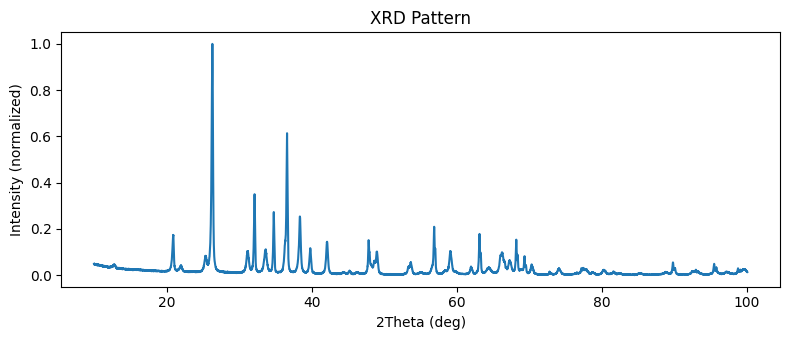

In [ ]:
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# ---------------- helpers ----------------
def _tag(e):  # strip XML namespace
    return e.tag.split('}')[-1] if '}' in e.tag else e.tag

def _find_first_by_suffix(root, suffixes):
    for e in root.iter():
        if _tag(e) in suffixes:
            return e
    return None

def _find_all_by_suffix(root, suffixes):
    return [e for e in root.iter() if _tag(e) in suffixes]

def _array_from_text(el):
    txt = (el.text or "").strip()
    if not txt:
        return np.array([], dtype=float)
    return np.fromstring(txt, sep=' ')

# ------------- robust parser -------------
def _parse_xrdml_robust(path):
    """
    Returns:
      two_theta (deg), intensity (counts), meta (dict)
    Tries multiple schema variants seen in PANalytical XRDML exports.
    """
    tree = ET.parse(path)
    root = tree.getroot()

    # 1) Locate the data block (often under dataPoints, but not always)
    data_blocks = _find_all_by_suffix(root, {"dataPoints", "DataPoints", "scan"})
    data_root = data_blocks[0] if data_blocks else root  # fall back to whole tree

    # 2) Find Y values (intensity) with a broad search
    y_candidates = _find_all_by_suffix(
        data_root,
        {"intensities", "intensity", "counts", "yValues", "Y", "YData", "YArray"}
    )
    y_el = y_candidates[0] if y_candidates else None
    if y_el is None:
        # sometimes nested elsewhere
        y_candidates = _find_all_by_suffix(
            root, {"intensities", "intensity", "counts", "yValues", "Y", "YData", "YArray"}
        )
        y_el = y_candidates[0] if y_candidates else None

    if y_el is None:
        # Debug aid: show what tags exist near data_root
        nearby = sorted({ _tag(e) for e in data_root.iter() })
        raise ValueError(f"No Y/intensity tag found. Seen tags include: {nearby[:30]} ...")

    y = _array_from_text(y_el)
    if y.size == 0:
        raise ValueError("Found a Y/intensity element but it was empty.")

    # 3) Find X values (positions)
    # Common variants: positions with start/step, explicit xValues array, or X
    positions_el = _find_first_by_suffix(data_root, {"positions", "Positions"})
    x_values_el  = _find_first_by_suffix(data_root, {"xValues", "X", "XData", "XArray", "positions"})  # fallback

    two_theta = None
    axis = "2Theta"; axis_unit = "deg"

    if positions_el is not None:
        # stepped or explicit
        start = _find_first_by_suffix(positions_el, {"startPosition", "StartPosition"})
        step  = _find_first_by_suffix(positions_el, {"commonPositionStep", "step", "Step"})
        endp  = _find_first_by_suffix(positions_el, {"endPosition", "EndPosition"})
        axis  = positions_el.attrib.get("axis", axis)
        axis_unit = positions_el.attrib.get("unit", axis_unit)

        if start is not None and (step is not None or endp is not None):
            start = float(start.text)
            if step is not None:
                step = float(step.text)
                two_theta = start + step * np.arange(y.size, dtype=float)
            else:
                endv = float(endp.text)
                two_theta = np.linspace(start, endv, y.size, dtype=float)
        else:
            # try text as explicit positions
            arr = _array_from_text(positions_el)
            two_theta = arr if arr.size == y.size else None

    if two_theta is None and x_values_el is not None:
        arr = _array_from_text(x_values_el)
        if arr.size == y.size:
            two_theta = arr
            # best effort at units
            axis_unit = x_values_el.attrib.get("unit", axis_unit)

    if two_theta is None:
        # final resort: search whole tree for something that looks like X array
        for el in _find_all_by_suffix(root, {"positions", "xValues", "X"}):
            arr = _array_from_text(el)
            if arr.size == y.size:
                two_theta = arr
                axis_unit = el.attrib.get("unit", axis_unit)
                break

    if two_theta is None:
        raise ValueError("Could not resolve X/2θ positions for XRDML.")

    # 4) meta
    intens_unit = y_el.attrib.get("unit", "counts")
    wavelength = None
    for e in root.iter():
        t = _tag(e)
        if t in {"wavelength", "Wavelength"} and (e.text or "").strip():
            try:
                wavelength = float(e.text.strip())
            except:
                wavelength = e.text.strip()
            break

    meta = {
        "axis": axis,
        "axis_unit": axis_unit,
        "intensity_unit": intens_unit,
        "wavelength": wavelength,
        "n_points": int(y.size),
        "two_theta_min": float(np.min(two_theta)),
        "two_theta_max": float(np.max(two_theta)),
    }
    return np.asarray(two_theta, float), np.asarray(y, float), meta

def inspect_xrdml(pattern_path, normalize=True, preview_rows=10):
    tt, ii, meta = _parse_xrdml_robust(pattern_path)

    yy = ii
    if normalize:
        rng = (ii.max() - ii.min()) or 1.0
        yy = (ii - ii.min()) / rng

    # print summary
    print("=== XRDML SUMMARY ===")
    for k, v in meta.items():
        print(f"{k}: {v}")
    print()

    # preview
    rows = min(preview_rows, len(tt))
    head = "\n".join(f"{tt[i]:.5f}, {yy[i]:.6g}" for i in range(rows))
    tail = "\n".join(f"{tt[-rows+i]:.5f}, {yy[-rows+i]:.6g}" for i in range(rows))
    lbl = "intensity_norm" if normalize else f"intensity ({meta['intensity_unit']})"

    print(f"--- Preview (first {rows}) ---\n2theta_deg,{lbl}\n{head}")
    print(f"\n--- Preview (last {rows}) ---\n2theta_deg,{lbl}\n{tail}\n")

    # plot
    plt.figure(figsize=(8, 3.5))
    plt.plot(tt, yy)
    plt.xlabel(f"{meta['axis']} ({meta['axis_unit']})")
    plt.ylabel("Intensity (normalized)" if normalize else f"Intensity ({meta['intensity_unit']})")
    plt.title("XRD Pattern")
    plt.tight_layout()
    plt.show()

# ---- run it ----
inspect_xrdml(pattern_path, normalize=True, preview_rows=10)


In [ ]:
import numpy as np
from math import sin, radians

try:
    from scipy.signal import find_peaks
    _HAVE_SCIPY = True
except Exception:
    _HAVE_SCIPY = False

def _simple_peaks(y, min_prom=0.02):
    """
    Minimal NumPy fallback if SciPy isn't available.
    Returns indices of local maxima above a simple threshold.
    """
    y = (y - y.min()) / (y.max() - y.min() + 1e-12)
    # local maxima
    lm = (y[1:-1] > y[:-2]) & (y[1:-1] > y[2:])
    idx = np.nonzero(lm)[0] + 1
    # crude prominence threshold
    idx = idx[y[idx] >= min_prom]
    # take top-N by value
    order = np.argsort(y[idx])[::-1]
    return idx[order]

def _peak_table(two_theta, intensity, wavelength_A=None, max_peaks=25):
    """
    CSV lines with header: two_theta_deg,d_A,rel_intensity
    rel_intensity is based on normalized intensity used for finding peaks.
    """
    y = (intensity - intensity.min())
    y = y / (y.max() + 1e-12)

    if _HAVE_SCIPY:
        peaks, props = find_peaks(y, prominence=0.02, width=1)
        if peaks.size:
            order = np.argsort(props["prominences"])[::-1]
            peaks = peaks[order]
    else:
        peaks = _simple_peaks(intensity, min_prom=0.02)

    peaks = peaks[:max_peaks]
    peaks = np.sort(peaks)

    lines = ["two_theta_deg,d_A,rel_intensity"]
    for p in peaks:
        tt = float(two_theta[p])
        rel = float(y[p])
        if wavelength_A is not None and tt > 0:
            theta = radians(tt / 2.0)
            dA = float(wavelength_A / (2.0 * sin(theta))) if theta != 0 else np.inf
        else:
            dA = np.nan
        lines.append(f"{tt:.4f},{dA:.5f},{rel:.4f}")
    return "\n".join(lines)

def analyze_xrdml(
    xrdml_path,
    question,
    *,
    max_points=1200,
    normalize=True,
    wavelength_override="CuKa",  # "CuKa"→1.5406 Å, "CoKa"→1.78897 Å, float, or None
    instrument_profile="Aeris-fds-Pixcel1D-Medipix3",
    model_name="gemini-2.5-flash"
):
    # --- parse using your robust parser ---
    two_theta, intensity, meta = _parse_xrdml_robust(xrdml_path)

    # --- wavelength override / label ---
    wl_A = None
    wl_label = str(meta.get("wavelength"))
    if isinstance(wavelength_override, (int, float)):
        wl_A = float(wavelength_override)
        wl_label = f"{wl_A:.5f} Å (override)"
    elif isinstance(wavelength_override, str):
        key = wavelength_override.strip().lower()
        if key in {"cuka", "cu", "cu kα", "cu kalpha"}:
            wl_A = 1.5406
            wl_label = "Cu Kα (1.5406 Å, override)"
        elif key in {"coka", "co", "co kα", "co kalpha"}:
            wl_A = 1.78897
            wl_label = "Co Kα (1.78897 Å, override)"

    # --- normalization (to match your inspect_xrdml) ---
    if normalize:
        rng = (intensity.max() - intensity.min()) or 1.0
        yy = (intensity - intensity.min()) / rng
        header = "2theta_deg,intensity_norm"
    else:
        yy = intensity
        header = "2theta_deg,intensity"

    # --- downsample for prompt size ---
    if len(yy) > max_points:
        idx = np.linspace(0, len(yy) - 1, max_points).astype(int)
        tt_ds = two_theta[idx]
        ii_ds = yy[idx]
    else:
        tt_ds, ii_ds = two_theta, yy

    # --- compact series CSV with your exact header ---
    series_lines = [header]
    series_lines += [f"{tt_ds[i]:.5f},{ii_ds[i]:.6g}" for i in range(len(ii_ds))]
    csv_snippet = "\n".join(series_lines)

    # --- peak table (computed on full resolution, using normalized y for rel_I) ---
    peaks_csv = _peak_table(two_theta, intensity if not normalize else yy, wavelength_A=wl_A, max_peaks=25)

    # --- prompt ---
    system_preamble = (
        "You are an expert in powder X-ray diffraction (XRD). "
        "Given the pattern below, answer the user's question. "
        "Use the peak table for reasoning (phases, key peaks, approximate d-spacings), "
        "and note caveats (background, Kα2, zero-shift, preferred orientation, size/strain)."
    )

    meta_text = (
        f"Axis={meta['axis']} ({meta['axis_unit']}), "
        f"Intensity unit={meta['intensity_unit']}, "
        f"Wavelength={wl_label}, "
        f"Instrument profile={instrument_profile}, "
        f"Points={meta['n_points']}, "
        f"Range={meta['two_theta_min']:.3f}–{meta['two_theta_max']:.3f} {meta['axis_unit']}."
    )

    prompt = (
        f"{system_preamble}\n\n"
        f"User question:\n{question}\n\n"
        f"Pattern metadata:\n{meta_text}\n\n"
        f"Peak table (top peaks by prominence):\n{peaks_csv}\n\n"
        f"Downsampled pattern (CSV):\n{csv_snippet}\n"
    )

    model = genai.GenerativeModel(model_name)
    resp = model.generate_content(prompt)
    return resp.text


In [ ]:
text = analyze_xrdml(
    pattern_path,
    "Identify likely phases; list strongest peaks (2θ, d, rel I), and any red flags.",
    max_points=1200,
    normalize=True,              # ensures 'intensity_norm' in CSV header
    wavelength_override="CuKa",  # or 1.5406
    instrument_profile="Aeris-fds-Pixcel1D-Medipix3"
)
print(text)


Based on the provided powder X-ray diffraction pattern and peak table, here is an analysis:

## Likely Phases

The most likely major phases present in the sample are:

1.  **Quartz ($\alpha$-SiO$_2$)**: This is strongly indicated by the most intense peak at 26.2466° 2$\theta$ (d=3.39269 Å), which aligns with the principal (101) reflection of quartz (reference: 26.65° 2$\theta$, d=3.343 Å). Other characteristic quartz peaks are also present and match well in d-spacing (e.g., 20.8351° 2$\theta$, d=4.26003 Å; 36.5588° 2$\theta$, d=2.45591 Å).

2.  **Pyrophyllite ($\text{Al}_2\text{Si}_4\text{O}_{10}(\text{OH})_2$)**: This phyllosilicate mineral provides excellent matches for several prominent peaks not explained by quartz. Key matches include 32.0710° 2$\theta$ (d=2.78859 Å), 34.7224° 2$\theta$ (d=2.58148 Å), and 38.3300° 2$\theta$ (d=2.34640 Å), whose relative intensities and d-spacings are in very good agreement with reference patterns for pyrophyllite (e.g., 32.0° 2$\theta$, d=2.79 Å; 

In [ ]:
text = analyze_xrdml(
    pattern_path,
    "Based on your previous phase identification, estimate your confidence in each proposed phase.Express this in terms of approximate Rwp or goodness-of-fit style metrics (0 – 100% confidence per phase) by comparing predicted vs. observed peak positions and relative intensities. Also, identify any unmatched peaks and whether they could meaningfully affect the overall fit quality.",
    max_points=1200,
    normalize=True,              # ensures 'intensity_norm' in CSV header
    wavelength_override="CuKa",  # or 1.5406
    instrument_profile="Aeris-fds-Pixcel1D-Medipix3"
)
print(text)

Based on the peak table and a preliminary phase identification, I've identified two primary crystalline phases and numerous significant unmatched peaks. My confidence assessment reflects how well the *characteristic* peaks of each proposed phase align with the observed pattern in terms of position and relative intensity.

**Summary of Proposed Phases:**

1.  **Moganite (SiO2)**
2.  **Quartz (SiO2)**

To improve peak matching, a small **zero-shift** of **+0.0169° 2θ** was estimated from the well-matched Quartz (100) peak (20.8351° observed vs. 20.852° reference). All d-spacings and 2θ values below refer to this zero-shift-corrected pattern.

---

### Confidence in Each Proposed Phase:

**1. Moganite (SiO2)**
*   **Confidence: ~90%**
*   **Reasoning**: The absolute strongest peak in the entire pattern, located at **26.2635° 2θ (d = 3.3900 Å)** with 100% relative intensity, is an excellent match for Moganite's primary diffraction peak (reference PDF 00-042-1364: 26.215° 2θ, d = 3.396 Å, 1

In [ ]:
text = analyze_xrdml(
    pattern_path,
    "The sample is a binary oxide system synthesized from GeO₂ and ZnO annealed. Considering this chemistry and temperature, re-evaluate the earlier interpretation. Which phases or solid solutions are most plausible (e.g., Zn₂GeO₄, ZnGeO₃, residual GeO₂, ZnO, or related polymorphs)? Cross-check whether the key peaks and d-spacings match these candidates and highlight any inconsistencies",
    max_points=1200,
    normalize=True,              # ensures 'intensity_norm' in CSV header
    wavelength_override="CuKa",  # or 1.5406
    instrument_profile= "Aeris-fds-Pixcel1D-Medipix3"
)
print(text)

ReadTimeout: HTTPConnectionPool(host='localhost', port=33647): Read timed out. (read timeout=600.0)

In [ ]:
text = analyze_xrdml(
    pattern_path,
    "Given that the sample was derived from GeO₂ + ZnO heated, use the ZnO–GeO₂ phase diagram and known thermodynamics to constrain possible crystalline products. Identify which known phases (e.g., rhombohedral Zn₂GeO₄, orthorhombic ZnGeO₃, quartz-type GeO₂, wurtzite ZnO) are consistent with the strongest diffraction peaks. Note any missing or extra peaks and suggest whether the sample is a mixture or single phase.",
    max_points=1200,
    normalize=True,              # ensures 'intensity_norm' in CSV header
    wavelength_override="CuKa",  # or 1.5406
    instrument_profile= "Aeris-fds-Pixcel1D-Medipix3"
)
print(text)

ReadTimeout: HTTPConnectionPool(host='localhost', port=33647): Read timed out. (read timeout=600.0)

GEMINI worked poorly on true XRD data

*   Over confident and wrong
*   Nudging it in right direction made it timed out


